### 2차원

In [1]:

import torch 
import matplotlib.pyplot as plt
import numpy as np
import random


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def U_printer(X,s=1000, utu_mode = False, epoch =5, iter = 5 ):

    U, S, V = torch.svd(X)
    # print('U_origin', U)
    if utu_mode == True:
        U = torch.matmul(U.T, U)
    # print('U', U)
    # H 행렬에서 벡터 추출
    U = U.cpu()
    # 벡터 그리기
    for l in range(U.size(0)):
        plt.quiver(0, 0, U[l, :][0], U[l, :][1], angles='xy', scale_units='xy', scale=1/s, color='r',zorder=2)


    # 축 설정
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

    # Extract the x and y values from the matrix
    x_values = X[0] - X[0].mean()
    y_values = X[1] - X[1].mean()
    # Plot the matrix
    plt.scatter(x_values.cpu(), y_values.cpu(),zorder=1)
    plt.xlim(-s, s)
    plt.ylim(-s, s)

    # 벡터 표시
    plt.legend(['Vector 1', 'Vector 2'])
    plt.title(f'U at epoch {epoch}, iter {iter}')

    plt.show()

def H_printer(H, X, s=1000, utu_mode = False, epoch =5, iter = 5):

    
    if utu_mode == True:
        H = torch.matmul(H.T, H)
    # print('HtH', H)
    # H 행렬에서 벡터 추출
    
    # 벡터 그릴려면 사이징 해야지
    for i in range(H.size(0)):
        H[i,:] /= torch.norm(H[i,:])
    print('HtH_postsizing', H)
    H = H.cpu()

    # 벡터 그리기
    for l in range(H.size(0)):
        plt.quiver(0, 0, H[l, :][0], H[l, :][1], angles='xy', scale_units='xy', scale=1/s, color='r',zorder=2)

    # 축 설정
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

    # Extract the x and y values from the matrix
    x_values = X[0] - X[0].mean()
    y_values = X[1] - X[1].mean()
    # Plot the matrix
    plt.scatter(x_values.to('cpu'), y_values.to('cpu'),zorder=1)
    plt.xlim(-s, s)
    plt.ylim(-s, s)

    # 벡터 표시
    plt.legend(['Vector 1', 'Vector 2'])
    plt.title(f'HtH at epoch {epoch}, iter {iter}')

    plt.show()
    # print('H',H)

# 상수항 늘리면 projection 이상하게 됨
def line(x, noise = 100):
    y = -50/2*x +torch.randn_like(x)*noise
    return y



def stdp(epoch = 5, iter = 1000, lr = 0.001,m = 2000, utu_mode = False): # lr 0.001이나 0.01쓴다.

    for k in range(epoch):
        H = torch.randn(1,2)
        # print('H.size()', H.size())
        # print('initial H', H)
        for i in range(iter):
            x = torch.arange(-m, m, dtype=torch.float32)
            x_line = line(x)
            H = H.to(device)
            X = torch.tensor([[x[i] for i in range(2*m)],
                                [x_line[i] for i in range(2*m)]], dtype=torch.float32).to(device)

            # print('X.size()', X.size())


            Y = HX = torch.matmul(H, X)
            # print('Y.size()', Y.size())
        
            YXt = torch.matmul(Y, X.T)
            # print('YXT.size()', YXt.size())
        
            YtH = torch.matmul(Y.T, H)
            # print('YTH.size()', YtH.size())
        
            YYtH = torch.matmul(Y, YtH)
            # print('YYTH.size()', YYtH.size())
        
            delta_H = torch.clamp((YXt - YYtH)/(X.size(1))**2, min=-10, max=10)
            # print('delta_H.size()', delta_H.size())
        
            rate = 1
            # rate = torch.sum(H)/torch.sum(delta_H)

            real_delta_H = rate*lr*delta_H 
            print('real_delta_H', real_delta_H)
            H = H + real_delta_H
            # print('real_delta_H', real_delta_H)

            

            if i % 10 == 0:
                H_printer(H,X, utu_mode = utu_mode, epoch = k, iter =i)
                # U_printer(X, utu_mode = False, epoch = epoch, iter =i)
        # H_printer(H,X, utu_mode = utu_mode, epoch = epoch, iter =i)
        # U_printer(X, utu_mode = False, epoch = epoch, iter =i)
        
    return H

H = stdp(utu_mode = True)

KeyboardInterrupt: 

### 3차원 실험

H and palne inner_product tensor([ 7.7071, -3.2863,  4.6440], device='cuda:0')
H own inner_product tensor([-28.8693, -17.5943,  40.4992], device='cuda:0')


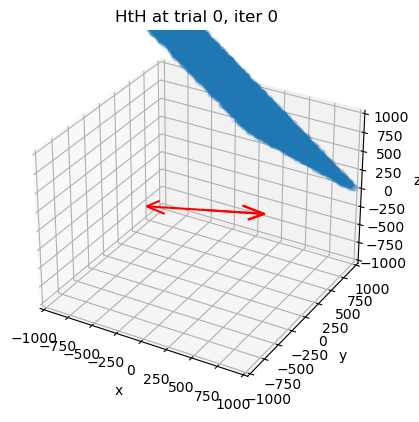

H and palne inner_product tensor([ 0.0480, -0.1559,  0.8398], device='cuda:0')
H own inner_product tensor([-0.4852, -0.0816, -0.0672], device='cuda:0')


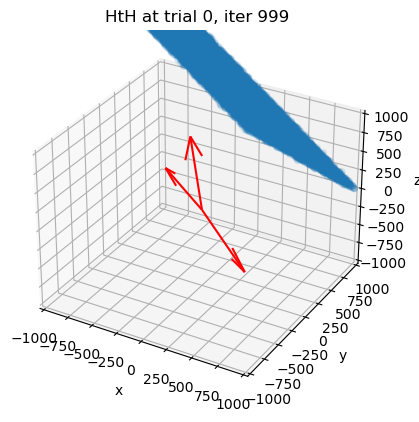

In [3]:

import torch 
import matplotlib.pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def H_printer(cor, H, X, s=1000, utu_mode = False, trial = 5, iter = 5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if utu_mode == True:
        H = torch.matmul(H.T, H).clone()
    # print('HtH', H)
    # # H 행렬에서 벡터 추출

    
    (x_c, y_c, z_c) = cor
    cor = torch.tensor([x_c, y_c, z_c], dtype=torch.float32).to(device)
    inner_product = torch.matmul(H, cor.T)
    print('H and palne inner_product', inner_product)

    own_inner = torch.tensor([torch.matmul(H[0], H[1].T), torch.matmul(H[1], H[2].T), torch.matmul(H[2], H[0].T)], dtype=torch.float32).to(device)
    print('H own inner_product', own_inner)

    
    # 벡터 그릴려면 사이징 해야지
    for i in range(H.size(0)):
        H[i,:] /= torch.norm(H[i,:])
    # print('HtH_postsizing', H)
    H*=s
    H = H.cpu()

    
    

    x_values = X[0, :].cpu()
    y_values = X[1, :].cpu()
    z_values = X[2, :].cpu()
    # Plot the matrix
    ax.scatter(x_values, y_values, z_values,alpha=0.1)

    # # 벡터 그리기
    for l in range(H.size(0)):
        ax.quiver(0, 0, 0, H[l, :][0], H[l, :][1], H[l, :][2], color='r')

    # 축 설정

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim([-s, s])
    ax.set_ylim([-s, s])
    ax.set_zlim([-s, s])


    # 벡터 표시
    plt.title(f'HtH at trial {trial}, iter {iter}')

    plt.show()
    # print('H',H)


def stdp(trial = 1, iter = 1000, lr = 0.001,m = 20000, utu_mode = False): # lr 0.001이나 0.01쓴다.

    for k in range(trial):
        H = torch.randn(2,3)
        # print('H.size()', H.size())
        # print('initial H', H)
        for i in range(iter):
            H = H.to(device)

            #x_c*x + y_c*y + z_c*z = 0
            x_c=1
            y_c=1
            z_c=1

            cor = (x_c, y_c, z_c)
            x = (torch.rand(1,m)-1/2)*2000 
            y = (torch.rand(1,m)-1/2)*2000 
            z = -x_c/z_c*x - y_c/z_c*y +2000
            
            noise = 10
            x += torch.randn(1,m)*noise
            y += torch.randn(1,m)*noise
            z += torch.randn(1,m)*noise

            X = torch.cat((x,y,z),0).to(device)
            # print('X.size()', X.size())


            Y = HX = torch.matmul(H, X)
            # print('Y.size()', Y.size())
        
            YXt = torch.matmul(Y, X.T)
            # print('YXT.size()', YXt.size())
        
            YtH = torch.matmul(Y.T, H)
            # print('YTH.size()', YtH.size())
        
            YYtH = torch.matmul(Y, YtH)
            # print('YYTH.size()', YYtH.size())

            # print('X.size(1)', X.size(1)) # m
            delta_H=(YXt - YYtH)/((X.size(1))**2)
            # print('sum of delta_H', torch.sum(delta_H))

            # rate = 0.1
            # delta_H *= rate
            delta_H = torch.clamp(delta_H, min=-10, max=10)
            # print('delta_H', delta_H)
            # print('delta_H.size()', delta_H.size())


            real_delta_H = lr*delta_H 
            H = H + real_delta_H
            # print('real_delta_H', real_delta_H)
            # print('H', H)

            

            if i % (1000) == 0:
                H_printer(cor, H,X, utu_mode = utu_mode, trial = k, iter =i)
                pass
        
        H_printer(cor, H,X, utu_mode = utu_mode, trial = k, iter =i)
        

stdp(utu_mode = True)

### HLOP원본코드

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# module for hebbian learning based orthogonal projection
class HLOP(nn.Module):

    def __init__(self, in_features, lr=0.01, momentum=True, spiking=False, spiking_scale=20., spiking_timesteps=1000.):
        super(HLOP, self).__init__()
        self.in_features = in_features

        self.subspace_num = 0
        self.out_numbers_list = []
        self.index_list = [0]
        self.weight = None
        self.momentum = momentum
        if self.momentum:
            self.delta_weight_momentum = None
            self.m = 0.9
        self.spiking = spiking
        self.spiking_scale = spiking_scale
        self.spiking_timesteps = spiking_timesteps

        self.lr = lr

    def add_subspace(self, out_numbers):
        if out_numbers > 0:
            self.subspace_num += 1
            self.out_numbers_list.append(out_numbers)
            self.index_list.append(self.index_list[-1] + out_numbers)

            if self.subspace_num == 1:
                self.weight = nn.Parameter(torch.zeros((out_numbers, self.in_features)))
                if self.momentum:
                    self.delta_weight_momentum = nn.Parameter(torch.zeros((out_numbers, self.in_features)))

                # initialize weights
                torch.nn.init.orthogonal_(self.weight.data)
                #torch.nn.init.xavier_normal_(self.weight.data)
                
            else:
                dim = self.weight.size(0) + out_numbers
                weight_new = torch.zeros((dim, self.in_features)).to(self.weight.device)
                if self.momentum:
                    delta_weight_momentum_new = torch.zeros((dim, self.in_features)).to(self.weight.device)

                weight_new[:self.weight.size(0), :] = self.weight.data
                if self.momentum:
                    delta_weight_momentum_new[:self.weight.size(0), :] = self.delta_weight_momentum.data

                # initialize new weights
                torch.nn.init.orthogonal_(weight_new[self.weight.size(0):, :])

                self.weight = nn.Parameter(weight_new)
                if self.momentum:
                    self.delta_weight_momentum = nn.Parameter(delta_weight_momentum_new)

    def merge_subspace(self):
        assert self.subspace_num > 0
        self.subspace_num = 1
        self.out_numbers_list = [self.index_list[-1]]
        print(self.index_list)
        print(self.out_numbers_list)
        self.index_list = [0, self.out_numbers_list[0]]
        print(self.index_list)

    def update_weights(self, x, y, xhat, fix_subspace_id_list=None):
        # x: B*N, y: B*M, weight: M*N
        weight = self.weight.data
        if self.momentum:
            delta_weight_momentum = self.delta_weight_momentum.data
        
        m, n = weight.size()
        assert n == x.size(1) and m == y.size(1)

        fix_index = []
        if fix_subspace_id_list != None:
            for sid in fix_subspace_id_list:
                fix_index.extend(range(self.index_list[sid], self.index_list[sid + 1]))

        delta_weight = (torch.mm(y.t(), x - xhat) / x.shape[0])
        delta_weight = torch.clamp(delta_weight, -10, 10)
        delta_weight[fix_index, :] = 0.
        lr = self.lr
        if self.momentum:
            fix_term = delta_weight_momentum[fix_index, :]
            delta_weight_momentum[fix_index, :] = 0
            delta_weight_momentum = self.m * delta_weight_momentum + (1 - self.m) * delta_weight
            weight = weight + lr * delta_weight_momentum
            delta_weight_momentum[fix_index, :] = fix_term
        else:
            weight = weight + lr * delta_weight

        self.weight.data = weight
        if self.momentum:
            self.delta_weight_momentum.data = delta_weight_momentum

    def set_subspace(self, weight, id_list=[0]):
        index = []
        for i in id_list:
            index.extend(range(self.index_list[i], self.index_list[i + 1]))
        self.weight.data[index, :] = weight.clone()

    def get_weight_value(self, id_list=[0]):
        index = []
        for i in id_list:
            index.extend(range(self.index_list[i], self.index_list[i + 1]))
        weight_ = self.weight.data[index, :].clone()
        return weight_

    def inference(self, x, subspace_id_list=[0]):
        index = []
        for sid in subspace_id_list:
            index.extend(range(self.index_list[sid], self.index_list[sid + 1]))

        weight = self.weight.data[index, :]

        y0 = torch.mm(x, weight.t())
        y = y0

        if self.spiking:
            y = (torch.clamp(y, -self.spiking_scale, self.spiking_scale) / self.spiking_scale * self.spiking_timesteps).round() / self.spiking_timesteps * self.spiking_scale

        return y

    def inference_back(self, y, subspace_id_list=[0]):
        index = []
        for sid in subspace_id_list:
            index.extend(range(self.index_list[sid], self.index_list[sid + 1]))

        weight = self.weight.data[index, :]

        x = torch.mm(y, weight)

        return x

    def projection(self, x, subspace_id_list=[0]):
        y = self.inference(x, subspace_id_list)
        x_proj = self.inference_back(y, subspace_id_list)

        return x_proj

    def forward_with_update(self, x, iteration=5, fix_subspace_id_list=None):
        subspace_id_list = list(range(self.subspace_num))
        for i in range(iteration):
            y = self.inference(x, subspace_id_list)
            xhat = self.inference_back(y, subspace_id_list)
            self.update_weights(x, y, xhat, fix_subspace_id_list)

    def projection_with_update(self, x, iteration=5, subspace_id_list=[0], fix_subspace_id_list=None):
        x_proj = self.projection(x, subspace_id_list)
        self.forward_with_update(x, iteration, fix_subspace_id_list)

        return x_proj

    def get_proj_func(self, iteration=5, subspace_id_list=[0], forward_with_update=False, fix_subspace_id_list=None):
        if forward_with_update:
            return lambda x: self.projection_with_update(x, iteration, subspace_id_list, fix_subspace_id_list)
        else:
            return lambda x: self.projection(x, subspace_id_list)

    def adjust_lr(self, gamma):
        self.lr = self.lr * gamma

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def U_printer(X, s=1000, utu_mode=False):
    U, S, V = torch.svd(X)
    if utu_mode:
        U = torch.matmul(U.T, U)
    
    vector1 = U[:, 0].cpu()
    vector2 = U[:, 1].cpu()
    vector3 = U[:, 2].cpu()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.quiver(0, 0, 0, vector1[0]*s, vector1[1]*s, vector1[2]*s, color='r',zorder=2)
    ax.quiver(0, 0, 0, vector2[0]*s, vector2[1]*s, vector2[2]*s, color='b',zorder=3)
    ax.quiver(0, 0, 0, vector3[0]*s, vector3[1]*s, vector3[2]*s, color='g',zorder=4)

    x_values = X[0] - X[0].mean()
    y_values = X[1] - X[1].mean()
    z_values = X[2] - X[2].mean()
    
    ax.scatter(x_values.cpu(), y_values.cpu(), z_values.cpu(),zorder =1)
    ax.set_xlim(-s, s)
    ax.set_ylim(-s, s)
    ax.set_zlim(-s, s)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(['Vector 1', 'Vector 2', 'Vector 3'])
    plt.title('U')
    plt.show()
    print('U',U)

def H_printer(H, X, s=1000, utu_mode=False):
    if utu_mode:
        H = torch.matmul(H.T, H)
    
    vector1 = H[:, 0].cpu()
    vector2 = H[:, 1].cpu()
    vector3 = H[:, 2].cpu()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.quiver(0, 0, 0, vector1[0]*s, vector1[1]*s, vector1[2]*s, color='r',zorder=2)
    ax.quiver(0, 0, 0, vector2[0]*s, vector2[1]*s, vector2[2]*s,color='b',zorder=3)
    ax.quiver(0, 0, 0, vector3[0]*s, vector3[1]*s, vector3[2]*s, color='g',zorder=4)

    x_values = X[0] - X[0].mean()
    y_values = X[1] - X[1].mean()
    z_values = X[2] - X[2].mean()

    ax.scatter(x_values.cpu(), y_values.cpu(), z_values.cpu(),zorder =1)
    ax.set_xlim(-s, s)
    ax.set_ylim(-s, s)
    ax.set_zlim(-s, s)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(['Vector 1', 'Vector 2', 'Vector 3'])
    plt.title('H')
    plt.show()

def line(x, noise=100):
    y = -5/2 * x + torch.randn_like(x) * noise
    return y

def linez(x, noise=100):
    z = 3/2 * x + torch.randn_like(x) * noise
    return z


def stdp(epoch=3, iter=100, lr=0.001, m=2000, utu_mode=False):
    for k in range(epoch):
        H = torch.randn(2, 3).to(device)
        for i in range(iter):
            x = torch.arange(-m, m, dtype=torch.float32)
            y = line(x)
            z = linez(x)

            X = torch.tensor([[x[i] for i in range(2*m)],
                              [y[i] for i in range(2*m)],
                              [z[i] for i in range(2*m)]], dtype=torch.float32).to(device)
            
            Y = torch.matmul(H, X) / X.size(1)
            YXt = torch.matmul(Y, X.T)
            YtH = torch.matmul(Y.T, H)
            YYtH = torch.matmul(Y, YtH)
            delta_H = YXt - YYtH
            rate = torch.sum(H) / torch.sum(delta_H)
            real_delta_H = rate * lr * delta_H
            H = H + real_delta_H
            # H_printer(H, X, utu_mode=utu_mode)
            # print(H)
        
        H_printer(H, X, utu_mode=utu_mode)
        print('H', H)
        U_printer(X, utu_mode=utu_mode)
        
    return H

H = stdp(utu_mode=True)